In [1]:
from __future__ import print_function
from p3d_model_offset_fyq import *
import torch

hello


In [2]:
model=P3D199_offset(pretrained=False,num_classes=400)
print (model)

P3D_offset(
  (conv1_custom): Conv3d (3, 64, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
  (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool3d(kernel_size=(2, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (maxpool_2): MaxPool3d(kernel_size=(2, 1, 1), stride=(2, 1, 1), padding=0, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck_offset(
      (downsample): Sequential(
        (0): Conv3d (64, 256, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
        (1): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True)
      )
      (conv1): Conv3d (64, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True)
      (offset): ConvOffset2D (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Conv3d (64, 64, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=Fa

In [4]:
# we have  pretrained data: 'p3d_rgb_199.checkpoint.pth.tar'
model=P3D199_offset(pretrained=False,num_classes=400)
model=model.cuda()
data=torch.autograd.Variable(torch.rand(10,3,16,160,160)).cuda()
out=model(data)
print(out.size(),out)

deform_conv_fyq.py:97: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.3. Note that arange generates values in [start; end), not [start; end].
  idx = th_repeat(torch.range(0, batch_size-1), n_coords).long()


torch.Size([10, 64, 8, 39, 39])
torch.Size([10, 64, 8, 39, 39])
torch.Size([10, 64, 8, 39, 39])
torch.Size([10, 128, 4, 20, 20])
torch.Size([10, 128, 4, 20, 20])
torch.Size([10, 128, 4, 20, 20])
torch.Size([10, 128, 4, 20, 20])
torch.Size([10, 128, 4, 20, 20])
torch.Size([10, 128, 4, 20, 20])
torch.Size([10, 128, 4, 20, 20])
torch.Size([10, 128, 4, 20, 20])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([10, 256, 2, 10, 10])
torch.Size([1

In [8]:
from PIL import Image
import torchvision.transforms as transforms
image_path='/home/hl/Desktop/lovelyqian/CV_Learning/UCF101_jpg/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01/image_00001.jpg'
img=Image.open(image_path)
img.show()
transform = transforms.Compose([
                transforms.RandomCrop(160),            #size
                # transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
#                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])         #nedd to calculute
                ])
transformed_img=transform(img)
img.close()

print (transformed_img)  #range [0,1]


( 0 ,.,.) = 
  0.0392  0.0471  0.0549  ...   0.8549  0.8471  0.8353
  0.0353  0.0510  0.0706  ...   0.8588  0.8588  0.8510
  0.0353  0.0510  0.0706  ...   0.8588  0.8549  0.8510
           ...             ⋱             ...          
  0.4314  0.3922  0.3961  ...   0.1843  0.1216  0.1412
  0.4000  0.4157  0.4549  ...   0.1843  0.1216  0.1412
  0.4000  0.4353  0.4471  ...   0.1843  0.1216  0.1412

( 1 ,.,.) = 
  0.0314  0.0392  0.0471  ...   0.6706  0.6627  0.6510
  0.0275  0.0431  0.0627  ...   0.6706  0.6706  0.6627
  0.0275  0.0431  0.0627  ...   0.6706  0.6667  0.6627
           ...             ⋱             ...          
  0.4078  0.3804  0.3843  ...   0.0863  0.0235  0.0431
  0.3765  0.3922  0.4431  ...   0.0863  0.0235  0.0431
  0.3765  0.4118  0.4353  ...   0.0863  0.0235  0.0431

( 2 ,.,.) = 
  0.1137  0.1216  0.1294  ...   0.7490  0.7412  0.7294
  0.0824  0.0980  0.1176  ...   0.7725  0.7725  0.7647
  0.0824  0.0980  0.1176  ...   0.7725  0.7686  0.7647
           ...         

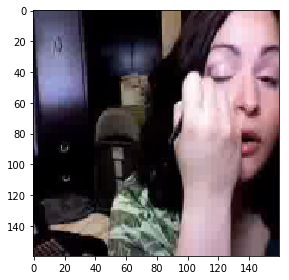


( 0 ,.,.) = 
   68.0000   68.0000   68.0000  ...    32.8750   21.5000   27.1250
   68.0000   68.0000   68.0000  ...    44.5000   26.3750   28.2500
   68.0000   68.0000   68.0000  ...    63.5000   35.7500   30.3750
              ...                ⋱                ...             
   43.6250   63.6250   56.8750  ...     7.0000    7.0000    7.0000
   43.5000   49.7500   51.2500  ...     7.0000    7.0000    7.0000
   61.8750   38.8750   35.8750  ...     7.0000    7.0000    7.0000

( 1 ,.,.) = 
   68.0000   68.0000   68.0000  ...     2.2500    0.0000    2.0000
   68.0000   68.0000   68.0000  ...    12.0000    0.0000    2.7500
   68.0000   68.0000   68.0000  ...    31.0000    7.7500    4.8750
              ...                ⋱                ...             
   27.8750   47.6250   40.8750  ...    13.0000   13.0000   13.0000
   27.5000   33.7500   35.2500  ...    13.0000   13.0000   13.0000
   45.8750   22.8750   19.8750  ...    13.0000   13.0000   13.0000

( 2 ,.,.) = 
   96.0000   96.0000

In [5]:
from skimage import io, color, exposure
from skimage.transform import resize
import numpy as np
image_path='/home/hl/Desktop/lovelyqian/CV_Learning/UCF101_jpg/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01/image_00025.jpg'
image=resize(io.imread(image_path),output_shape=(160,160),preserve_range= True)    #240,320,3--160,160,3
io.imshow(image.astype(np.uint8))
io.show()
image =image.transpose(2, 0, 1)              #3,160,160
image= torch.from_numpy(image)               #range[0,255]
print (image)

(7186, 2)
(7186,)


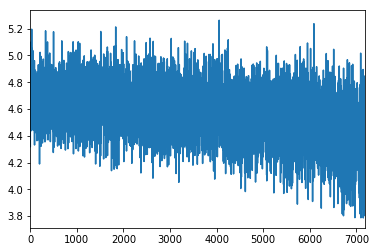

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result1_fyq_readimage2_size8_lr0_001.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)
s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()


(14372, 2)
(14372,)


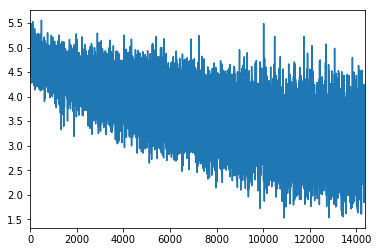

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result2_fyq_readimage2_size8_lr0_001_videoM_mome0_9.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)
s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()

(7186, 2)
(7186,)


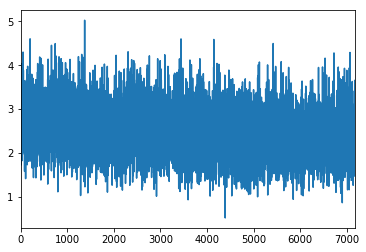

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result3_fyq_lr0_0001_lr_00001.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)
s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()

(7186, 2)
(7186,)


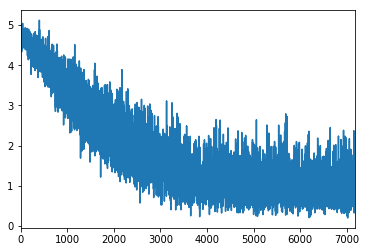

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result4_fyq_author_lr0_0001_lr0_00001.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)
s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()

(14373, 2)
(14373,)


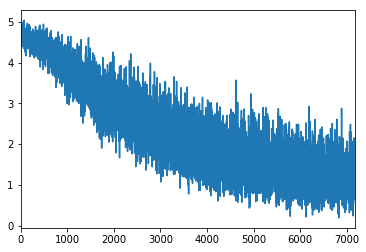

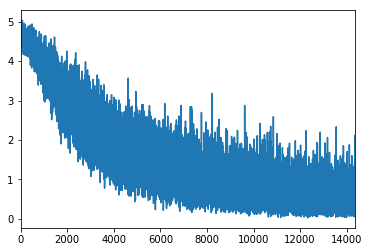

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result5_conv_s_author_lr0_0001.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)

s=pd.Series(lossstr[0:7185],index=np.arange(7186))
s.plot()
plt.show()

s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result6_fyq_conv_s_author_lr0_0001_lr0_00001.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)

s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()

IOError: File /home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result6_fyq_conv_s_author_lr0_0001_lr0_00001.txt does not exist

(7186, 2)
(7186,)


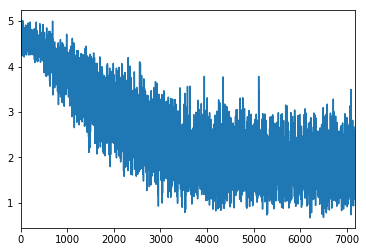

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result6_fyq_conv_s_author_lr0_0001_lr0_00001.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)

s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()

(14372, 2)
(14372,)


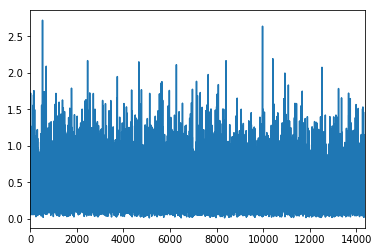

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result7_fyq_conv_s_author_lr0_00001.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)

s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()

(14372, 2)
(14372,)


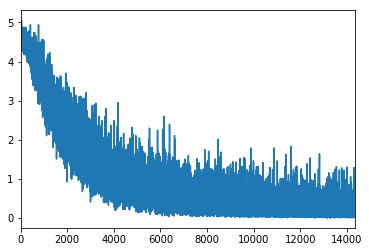

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result8_fyq_author_lr0_0001.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)

s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()

(14372, 2)
(14372,)


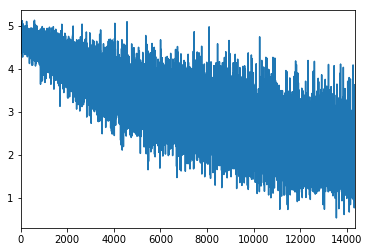

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result9_fyq_comv_T_author_lr0_0001.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)

s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()

(518, 2)
(518,)


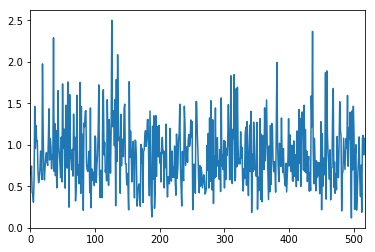

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/home/hl/Desktop/lovelyqian/CV_Learning/pseudo-3d-conv_S/result10_p3d.txt',delimiter=':')
print (data.shape)
lossstr=data.iloc[:,1]
print (lossstr.shape)

s=pd.Series(lossstr,index=np.arange(lossstr.shape[0]))
s.plot()
plt.show()